In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Data

In [69]:
df  = pd.read_csv("Facebook_Marketplace_data.csv")







Question 1

<Axes: >

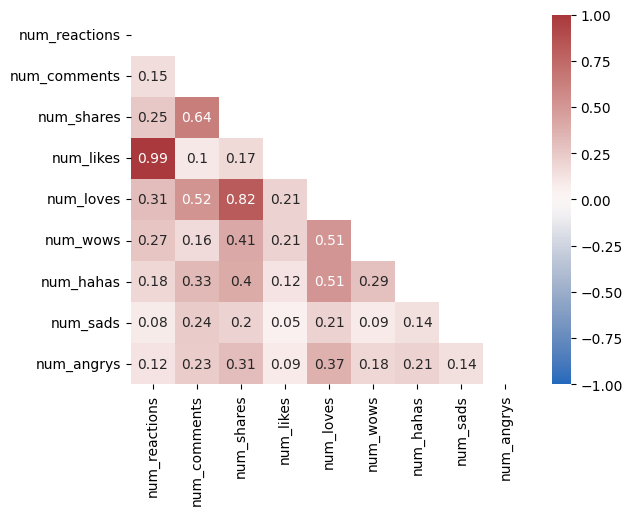

In [70]:
df1 = df[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]]

matrix = df1.corr().round(2)
mask = np.triu(np.ones_like(matrix,dtype =bool))
sns.heatmap(df1.corr().round(2),annot=True,vmin =-1,vmax=1,center =0,cmap="vlag",mask=mask)

In [71]:
x = df.iloc[:,:12].values

print(pd.DataFrame(x))


        0      1                 2    3    4    5    6   7  8  9  10 11
0        1  video    4/22/2018 6:00  529  512  262  432  92  3  1  1  0
1        2  photo   4/21/2018 22:45  150    0    0  150   0  0  0  0  0
2        3  video    4/21/2018 6:17  227  236   57  204  21  1  1  0  0
3        4  photo    4/21/2018 2:29  111    0    0  111   0  0  0  0  0
4        5  photo    4/18/2018 3:22  213    0    0  204   9  0  0  0  0
...    ...    ...               ...  ...  ...  ...  ...  .. .. .. .. ..
7045  7046  photo    9/24/2016 2:58   89    0    0   89   0  0  0  0  0
7046  7047  photo   9/23/2016 11:19   16    0    0   14   1  0  1  0  0
7047  7048  photo   9/21/2016 23:03    2    0    0    1   1  0  0  0  0
7048  7049  photo    9/20/2016 0:43  351   12   22  349   2  0  0  0  0
7049  7050  photo  09-10-2016 10:30   17    0    0   17   0  0  0  0  0

[7050 rows x 12 columns]


Preprocessing Data

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values =np.nan , strategy= "mean")
imputer.fit(x[:,3:])
x[:,3:] = imputer.transform(x[:,3:])
print(pd.DataFrame(x))


        0      1                 2      3      4      5      6     7    8   \
0        1  video    4/22/2018 6:00  529.0  512.0  262.0  432.0  92.0  3.0   
1        2  photo   4/21/2018 22:45  150.0    0.0    0.0  150.0   0.0  0.0   
2        3  video    4/21/2018 6:17  227.0  236.0   57.0  204.0  21.0  1.0   
3        4  photo    4/21/2018 2:29  111.0    0.0    0.0  111.0   0.0  0.0   
4        5  photo    4/18/2018 3:22  213.0    0.0    0.0  204.0   9.0  0.0   
...    ...    ...               ...    ...    ...    ...    ...   ...  ...   
7045  7046  photo    9/24/2016 2:58   89.0    0.0    0.0   89.0   0.0  0.0   
7046  7047  photo   9/23/2016 11:19   16.0    0.0    0.0   14.0   1.0  0.0   
7047  7048  photo   9/21/2016 23:03    2.0    0.0    0.0    1.0   1.0  0.0   
7048  7049  photo    9/20/2016 0:43  351.0   12.0   22.0  349.0   2.0  0.0   
7049  7050  photo  09-10-2016 10:30   17.0    0.0    0.0   17.0   0.0  0.0   

       9    10   11  
0     1.0  1.0  0.0  
1     0.0  0.0  0.0

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1])],remainder="passthrough")
x = np.array(ct.fit_transform(x))
print(pd.DataFrame(x))


       0    1    2    3     4                 5      6      7      8      9   \
0     0.0  0.0  0.0  1.0     1    4/22/2018 6:00  529.0  512.0  262.0  432.0   
1     0.0  1.0  0.0  0.0     2   4/21/2018 22:45  150.0    0.0    0.0  150.0   
2     0.0  0.0  0.0  1.0     3    4/21/2018 6:17  227.0  236.0   57.0  204.0   
3     0.0  1.0  0.0  0.0     4    4/21/2018 2:29  111.0    0.0    0.0  111.0   
4     0.0  1.0  0.0  0.0     5    4/18/2018 3:22  213.0    0.0    0.0  204.0   
...   ...  ...  ...  ...   ...               ...    ...    ...    ...    ...   
7045  0.0  1.0  0.0  0.0  7046    9/24/2016 2:58   89.0    0.0    0.0   89.0   
7046  0.0  1.0  0.0  0.0  7047   9/23/2016 11:19   16.0    0.0    0.0   14.0   
7047  0.0  1.0  0.0  0.0  7048   9/21/2016 23:03    2.0    0.0    0.0    1.0   
7048  0.0  1.0  0.0  0.0  7049    9/20/2016 0:43  351.0   12.0   22.0  349.0   
7049  0.0  1.0  0.0  0.0  7050  09-10-2016 10:30   17.0    0.0    0.0   17.0   

        10   11   12   13   14  
0     

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:,6:] = sc.fit_transform(x[:,6:])
PRI = pd.DataFrame(x)
print(PRI)
x = np.delete(x,4,1)
x = np.delete(x,4,1)
print(pd.DataFrame(x))



       0    1    2    3     4                 5         6         7   \
0     0.0  0.0  0.0  1.0     1    4/22/2018 6:00  0.646104   0.32335   
1     0.0  1.0  0.0  0.0     2   4/21/2018 22:45 -0.173192 -0.252206   
2     0.0  0.0  0.0  1.0     3    4/21/2018 6:17 -0.006738  0.013089   
3     0.0  1.0  0.0  0.0     4    4/21/2018 2:29 -0.257499 -0.252206   
4     0.0  1.0  0.0  0.0     5    4/18/2018 3:22 -0.037003 -0.252206   
...   ...  ...  ...  ...   ...               ...       ...       ...   
7045  0.0  1.0  0.0  0.0  7046    9/24/2016 2:58 -0.305057 -0.252206   
7046  0.0  1.0  0.0  0.0  7047   9/23/2016 11:19 -0.462863 -0.252206   
7047  0.0  1.0  0.0  0.0  7048   9/21/2016 23:03 -0.493128 -0.252206   
7048  0.0  1.0  0.0  0.0  7049    9/20/2016 0:43  0.261316 -0.238717   
7049  0.0  1.0  0.0  0.0  7050  09-10-2016 10:30 -0.460702 -0.252206   

            8         9         10        11        12        13        14  
0     1.686879  0.482727  1.983266  0.196196  0.076713   0

Question 2

elbow methord

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

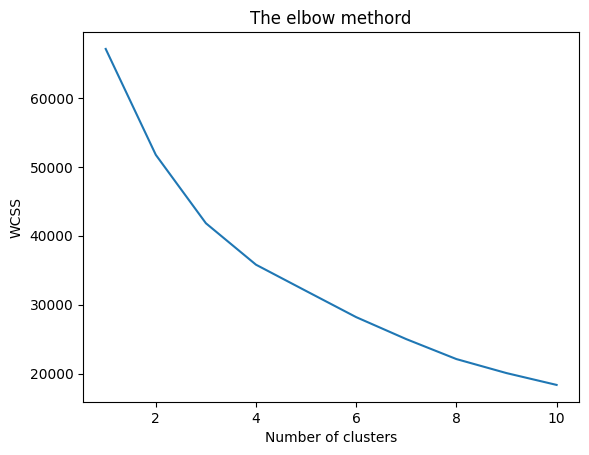

In [75]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow methord")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Question 3


K-Map clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


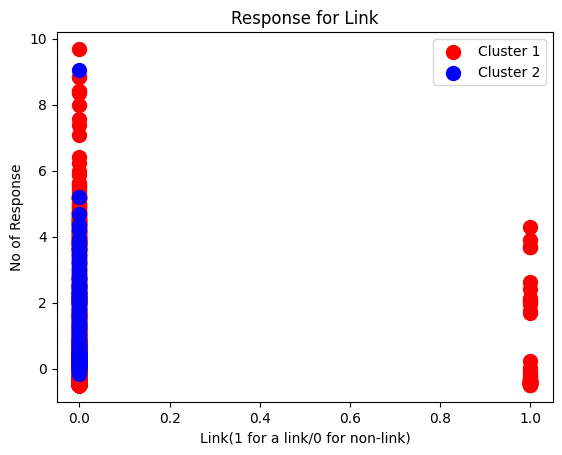

In [76]:
#2 is the optinomal no of clusters
kmeans = KMeans(n_clusters=2,init="k-means++",random_state=42)
y_pred = kmeans.fit_predict(x)
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,4],s=100,c="red",label="Cluster 1")
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,4],s=100,c="blue",label="Cluster 2")
plt.title("Response for Link")
plt.xlabel("Link(1 for a link/0 for non-link)")
plt.ylabel("No of Response")
plt.legend()
plt.show()

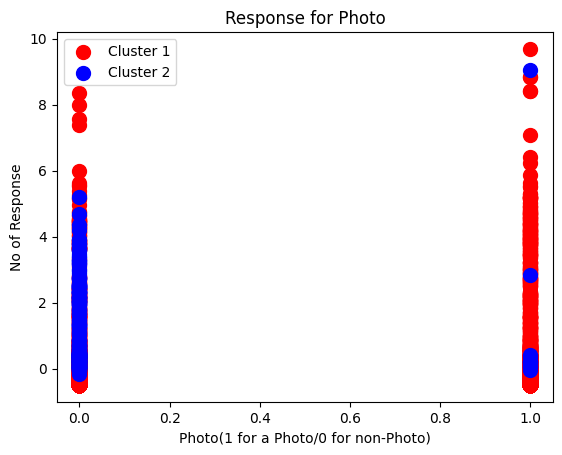

In [77]:
plt.scatter(x[y_pred == 0,1],x[y_pred == 0,4],s=100,c="red",label="Cluster 1")
plt.scatter(x[y_pred == 1,1],x[y_pred == 1,4],s=100,c="blue",label="Cluster 2")
plt.title("Response for Photo")
plt.xlabel("Photo(1 for a Photo/0 for non-Photo)")
plt.ylabel("No of Response")
plt.legend()
plt.show()

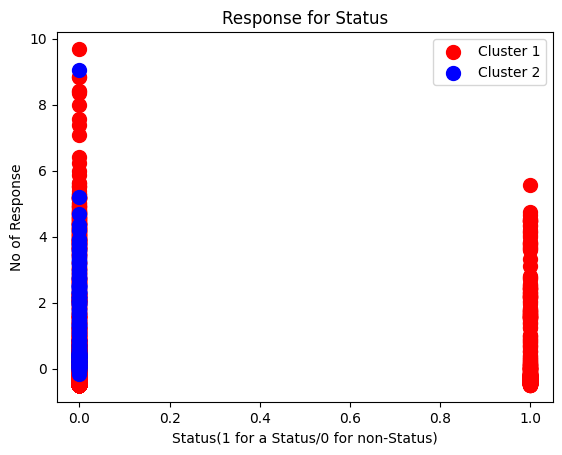

In [78]:
plt.scatter(x[y_pred == 0,2],x[y_pred == 0,4],s=100,c="red",label="Cluster 1")
plt.scatter(x[y_pred == 1,2],x[y_pred == 1,4],s=100,c="blue",label="Cluster 2")
plt.title("Response for Status")
plt.xlabel("Status(1 for a Status/0 for non-Status)")
plt.ylabel("No of Response")
plt.legend()
plt.show()

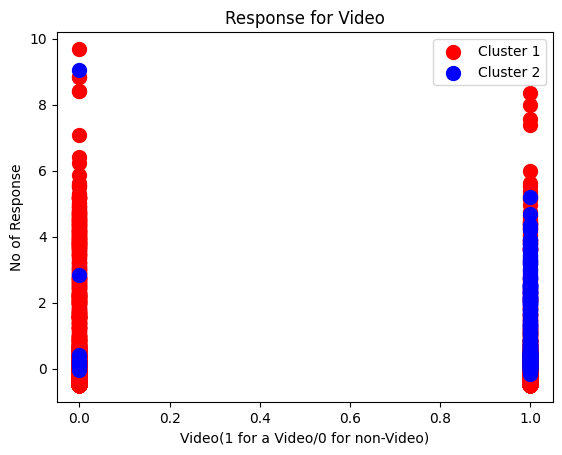

In [79]:
plt.scatter(x[y_pred == 0,3],x[y_pred == 0,4],s=100,c="red",label="Cluster 1")
plt.scatter(x[y_pred == 1,3],x[y_pred == 1,4],s=100,c="blue",label="Cluster 2")
plt.title("Response for Video")
plt.xlabel("Video(1 for a Video/0 for non-Video)")
plt.ylabel("No of Response")
plt.legend()
plt.show()

Question 4

In [80]:
n = len(pd.unique(df['status_type']))

print("No.of post types :", n)

No.of post types : 4


Question 5

In [81]:
subset = df.groupby('status_type').agg({"num_reactions": "mean", "num_comments": "mean", "num_shares": "mean"})
print(subset)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
